# OLS - Wooldridge Computer Exercise
## Chapter 2, Exercise 7

## To add a heading:
- Insert a new cell
- Type or paste-in content
- Place a single / just one "pound-sign" in front of the heading content
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## To add a sub-heading:
- Insert a new cell
- Type or paste-in content
- Place two "pound-signs" in front of the sub-heading
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## To add new bulleted documentation:

- Insert a new cell
- Type or paste-in content
- Place a "dash" character in front of the bulleted content
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

# References
- Wooldridge, J.M. (2016). Introductory econometrics: A modern approach (6thed.). Mason, OH: South-Western, Cengage Learning.
- Residual Plots: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
- Understanding residual plots: https://data.library.virginia.edu/diagnostic-plots/

# Instantiate libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.formula.api import ols
from statsmodels.compat import lzip

from statsmodels.graphics.gofplots import ProbPlot

#import pandas.tseries.api as sm
#from tseries.formula.apt import ols

from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr


plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)


# Data Read from csv

In [2]:
%%time
#df = pd.read_csv(BytesIO(csv_as_bytes),sep='|',nrows=100000)
df1 = pd.read_csv('C://Users//Family//Documents//DataSetEconomics//Wooldridge//Charity.csv',sep=',')
print(df1.head())

   OBS  RESPONSE  GIFT  RESPLASTMAIL  WEEKSLASTRESP  PROPRESPONSE  \
0    1         0     0             0     143.000000           0.3   
1    2         0     0             0      65.428571           0.3   
2    3         0     0             1      13.142857           0.3   
3    4         0     0             0     120.142857           0.3   
4    5         1    10             0     103.857143           0.2   

   MAILSPERYEAR  GIFTLASTRESP  AVERAGEGIFT  
0           2.5            10         10.0  
1           2.5            10         10.0  
2           2.5            10         10.0  
3           2.5            10         10.0  
4           2.5            10         10.0  
Wall time: 737 ms


In [3]:
df1['constant'] = 1

# Data Checks

- Columns

In [4]:
%%time
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4268 entries, 0 to 4267
Data columns (total 10 columns):
OBS              4268 non-null int64
RESPONSE         4268 non-null int64
GIFT             4268 non-null int64
RESPLASTMAIL     4268 non-null int64
WEEKSLASTRESP    4268 non-null float64
PROPRESPONSE     4268 non-null float64
MAILSPERYEAR     4268 non-null float64
GIFTLASTRESP     4268 non-null int64
AVERAGEGIFT      4268 non-null float64
constant         4268 non-null int64
dtypes: float64(4), int64(6)
memory usage: 333.5 KB
Wall time: 143 ms


In [5]:
mean_gift = np.mean(df1['AVERAGEGIFT'])
print(mean_gift)

18.242837164331057


In [9]:
count_all = np.sum(df1['constant'])
df2 = df1[df1['GIFT'] == 0]
count_zero = np.sum(df2['constant'])
print(count_all)
print(count_zero)
pct_zero = (count_zero / count_all)*100
print(pct_zero)

4268
2561
60.00468603561387


In [11]:
mean_mailings = np.mean(df1['MAILSPERYEAR'])
min_mailings = np.min(df1['MAILSPERYEAR'])
max_mailings = np.max(df1['MAILSPERYEAR'])
print(mean_mailings)
print(min_mailings)
print(max_mailings)


2.0495548266166823
0.25
3.5


# OLS: Regress MAILSPERYEAR on GIFT 

In [13]:
formula = '''GIFT ~ (MAILSPERYEAR)
'''
#model = ols(formula, df).fit(cov_type='HC0')
model = ols(formula, df1)
results = model.fit()
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)
print(results.summary())

                     sum_sq      df         F        PR(>F)
MAILSPERYEAR   13349.725136     1.0  59.64904  1.403549e-14
Residual      954750.114367  4266.0       NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                   GIFT   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     59.65
Date:                Thu, 25 Oct 2018   Prob (F-statistic):           1.40e-14
Time:                        19:51:11   Log-Likelihood:                -17602.
No. Observations:                4268   AIC:                         3.521e+04
Df Residuals:                    4266   BIC:                         3.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std

In [14]:
# fitted values (need a constant term for intercept)
model_fitted_y = results.fittedvalues
min_fitted_y = np.min(model_fitted_y)
print(min_fitted_y)



2.6764663981857106


# Residual Plotting
- First add some setup variables from the "results" model output.

In [15]:
# fitted values (need a constant term for intercept)
model_fitted_y = results.fittedvalues

# model residuals
model_residuals = results.resid

# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = results.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = results.get_influence().cooks_distance[0]

# Residual Plot
## non-linear plot line indicative of non-linear relationship not captured in model

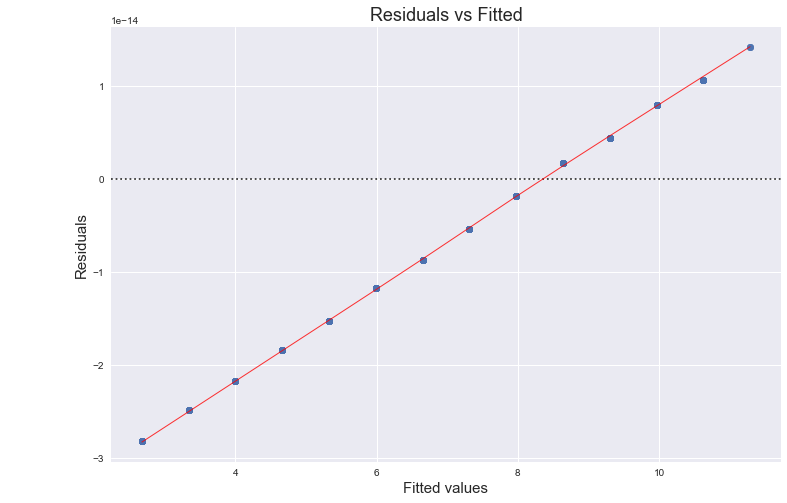

In [17]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'MAILSPERYEAR', data=df1, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

# QQ Plot
- residuals following plot line well indicative of normally distributed residuals
- residuals that deviate sharply indicative of non-normally distributed residuals

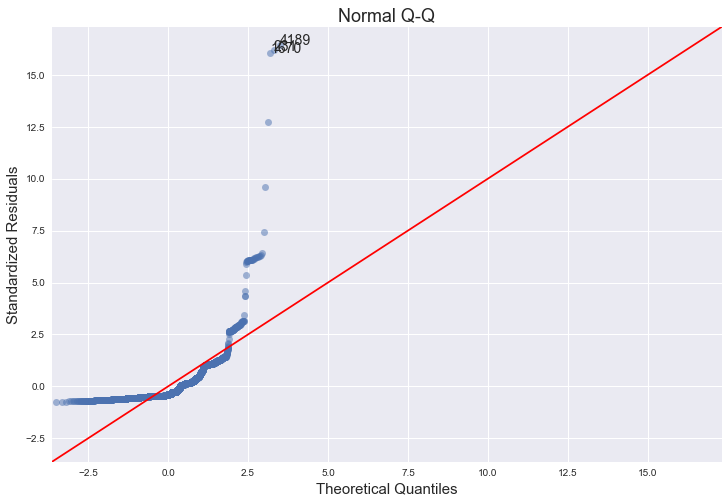

In [18]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

# Scale Location Plot
## indicative of homoscedastic residuals
- Good to see even spread with horizontal line
- Bad to see sloped line with spread following a pattern

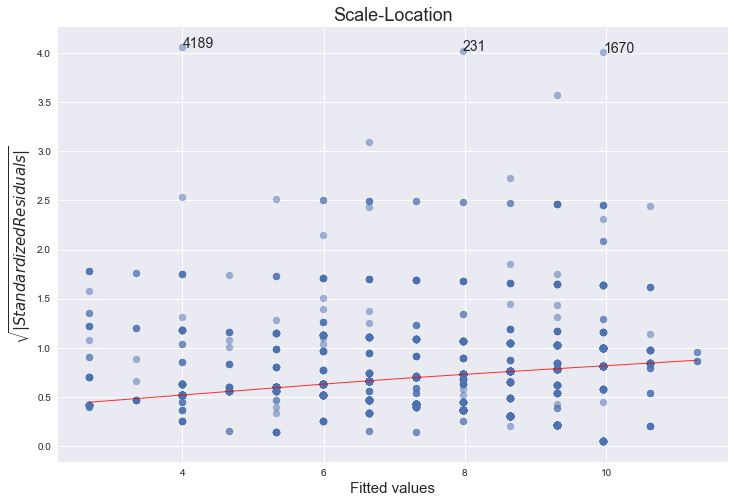

In [19]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

# Leverage Plot
## helps us find influential cases (outliers)

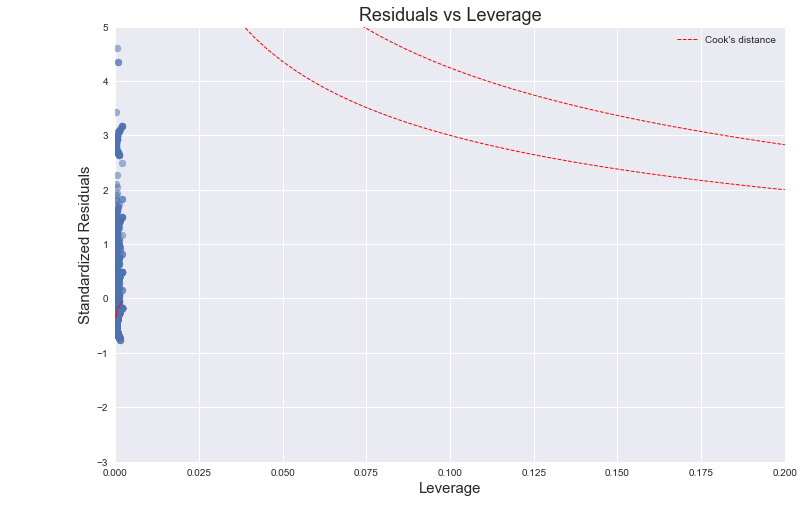

In [20]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(results.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');


In [21]:
print("Heteroscedasticity Test - Breusch Pagan")
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

Heteroscedasticity Test - Breusch Pagan


[('Lagrange multiplier statistic', 2.141610537831189),
 ('p-value', 0.14335132692337454),
 ('f-value', 2.141681631288016),
 ('f p-value', 0.14341835908719297)]

In [22]:
print("Heteroscedasticity Test - Goldfeld Quandt")
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)



Heteroscedasticity Test - Goldfeld Quandt


[('F statistic', 0.5476337132863057), ('p-value', 0.9999999999999999)]

In [23]:
# Multicolinearity
np.linalg.cond(results.model.exog)

8.33883366285138

# Data Explorations

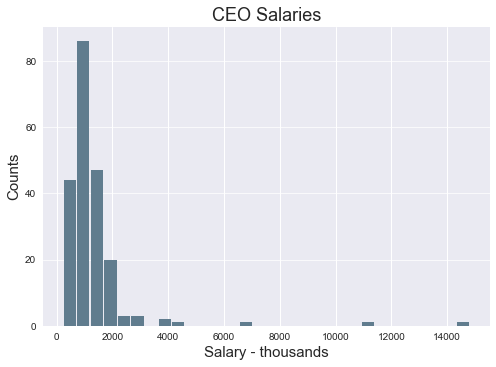

In [13]:
#hist_series = pd.Series(df1.salary)
#hist_series.plot.hist(grid=True, bins=10, rwidth=0.9, color='#607c8e')
df1.salary.plot.hist(grid=True, bins=30, rwidth=0.9, color='#607c8e')
plt.title('CEO Salaries')
plt.xlabel('Salary - thousands')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

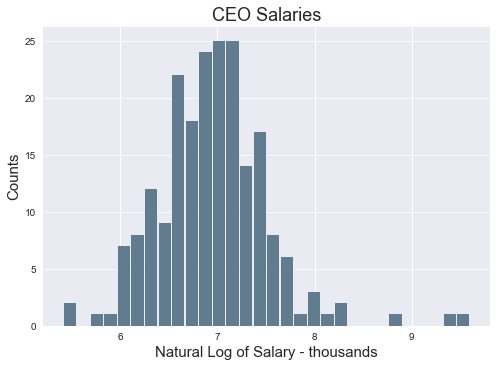

In [14]:
#hist_series = pd.Series(df1.salary)
#hist_series.plot.hist(grid=True, bins=10, rwidth=0.9, color='#607c8e')
df1.lsalary.plot.hist(grid=True, bins=30, rwidth=0.9, color='#607c8e')
plt.title('CEO Salaries')
plt.xlabel('Natural Log of Salary - thousands')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

# Non-Linearities: Functional Form
## Log(Salary) regressed on Log(Sales)

In [31]:
formula = '''lsalary ~ (lsales)
'''
#model = ols(formula, df).fit(cov_type='HC0')
model = ols(formula, df1)
results = model.fit()
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)
print(results.summary())


             sum_sq     df         F        PR(>F)
lsales    14.066171    1.0  55.29659  2.703389e-12
Residual  52.656002  207.0       NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     55.30
Date:                Sun, 14 Oct 2018   Prob (F-statistic):           2.70e-12
Time:                        19:26:35   Log-Likelihood:                -152.50
No. Observations:                 209   AIC:                             309.0
Df Residuals:                     207   BIC:                             315.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   